In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
import datetime as dt
import requests
from plotly.subplots import make_subplots

In [39]:
#Vores primære datasæt er udtrukket fra Esri (et websted, der leverer opdaterede data om coronavirus) ved hjælp af en forespørgsels-URL Requests er en python-pakke, der bruges til at udtrække data fra en given JSON-fil. I denne kode brugte jeg anmodninger til at udtrække data fra den givne forespørgsels-URL af Esri. 
# Vi er nu klar til at lave noget datastrid!

In [40]:
# Getting Data

url_request = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
df = pd.DataFrame(url_json['features'])
df['attributes'][0]

{'OBJECTID': 1,
 'Province_State': None,
 'Country_Region': 'Afghanistan',
 'Last_Update': 1662873645000,
 'Lat': 33.93911,
 'Long_': 67.709953,
 'Confirmed': 195631,
 'Recovered': 0,
 'Deaths': 7787,
 'Active': 0,
 'Admin2': None,
 'FIPS': None,
 'Combined_Key': 'Afghanistan'}

### Data Wrangling

In [41]:
df.shape

(793, 2)

In [42]:
df.columns

Index(['attributes', 'geometry'], dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   attributes  793 non-null    object
 1   geometry    773 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


In [72]:
df.head()

,attributes,geometry
0,"{'OBJECTID': 1, 'Province_State': None, 'Count...","{'x': 67.70995300000004, 'y': 33.93911000000003}"
1,"{'OBJECTID': 2, 'Province_State': None, 'Count...","{'x': 20.168300000000045, 'y': 41.15330000000006}"
2,"{'OBJECTID': 3, 'Province_State': None, 'Count...","{'x': 1.6596000000000686, 'y': 28.033900000000..."
3,"{'OBJECTID': 4, 'Province_State': None, 'Count...","{'x': 1.5218000000000416, 'y': 42.50630000000007}"
4,"{'OBJECTID': 5, 'Province_State': None, 'Count...","{'x': 17.87390000000005, 'y': -11.202699999999..."


In [43]:
# Data Wrangling

# a. transforming data

data_list = df['attributes'].tolist()
data = pd.DataFrame(data_list)
data.set_index('OBJECTID')
data = data[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
data.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
data['State'].fillna(value = '', inplace = True)
data



,State,Country,Last Update,Lat,Long,Confirmed,Recovered,Deaths,Active
0,,Afghanistan,1.662874e+12,33.939110,67.709953,195631,0,7787,0
1,,Albania,1.662874e+12,41.153300,20.168300,330948,0,3584,0
2,,Algeria,1.662874e+12,28.033900,1.659600,270532,0,6879,0
3,,Andorra,1.662874e+12,42.506300,1.521800,46113,0,155,0
4,,Angola,1.662874e+12,-11.202700,17.873900,103131,0,1917,0
...,...,...,...,...,...,...,...,...,...
788,Ohio,US,1.662874e+12,40.388783,-82.764915,3096557,0,39576,0
789,Alabama,US,1.662874e+12,32.318200,-86.902300,1504180,0,20239,0
790,North Carolina,US,1.662874e+12,35.630066,-79.806419,3141302,0,26365,0
791,District of Columbia,US,1.662874e+12,38.897438,-77.026817,166893,0,1382,0


In [44]:
# b. cleaning data

def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)

data = data.dropna(subset = ['Last Update'])
data['Last Update'] = data['Last Update']/1000
data['Last Update'] = data['Last Update'].apply(convert_time)
data

C:\Users\denso\AppData\Local\Temp\ipykernel_21340\2632598562.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\denso\AppData\Local\Temp\ipykernel_21340\2632598562.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Country,Last Update,Lat,Long,Confirmed,Recovered,Deaths,Active
0,,Afghanistan,2022-09-11 07:20:45,33.939110,67.709953,195631,0,7787,0
1,,Albania,2022-09-11 07:20:45,41.153300,20.168300,330948,0,3584,0
2,,Algeria,2022-09-11 07:20:45,28.033900,1.659600,270532,0,6879,0
3,,Andorra,2022-09-11 07:20:45,42.506300,1.521800,46113,0,155,0
4,,Angola,2022-09-11 07:20:45,-11.202700,17.873900,103131,0,1917,0
...,...,...,...,...,...,...,...,...,...
788,Ohio,US,2022-09-11 07:20:45,40.388783,-82.764915,3096557,0,39576,0
789,Alabama,US,2022-09-11 07:20:45,32.318200,-86.902300,1504180,0,20239,0
790,North Carolina,US,2022-09-11 07:20:45,35.630066,-79.806419,3141302,0,26365,0
791,District of Columbia,US,2022-09-11 07:20:45,38.897438,-77.026817,166893,0,1382,0


 ### Exploratory Data Analysis and Data Visualization
 Exploratory Data Analysis & Visualization

Denne proces er ret lang, da den er hjertet og sjælen i dataanalyse. Så jeg har opdelt denne proces i tre trin:

a. Rangering af lande og provinser (baseret på COVID-19-aspekter)

b. Tidsserie om COVID-19-tilfælde

c. Klassificering og fordeling af sager

In [45]:
# a. top10_confirmed
top10_confirmed = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')
fig1.show()

#### Følgende kode vil producere et plot, der rangerer de 10 bedste lande baseret på dødssager.

In [46]:
# b. Top 10 deaths countries (h-Bar plot)

top10_deaths = pd.DataFrame(data.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases Countries')
fig2.show()

#### Følgende kode vil producere et plot, der rangerer de 10 bedste lande baseret på genoprettet tilfælde.

In [47]:
# c. Top 10 recovered countries (Bar plot)

top10_recovered = pd.DataFrame(data.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

In [48]:
# d. Top 10 active countries

top10_active = pd.DataFrame(data.groupby('Country')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active, x = 'Active', y = top10_active.index, height = 600, color = 'Active', orientation = 'h',
             color_continuous_scale = ['paleturquoise','blue'], title = 'Top 10 Active Cases Countries')
fig4.show()


#### Rangering af de mest berørte stater i stort set berørte lande:

EDA for rangerende stater i stort set berørte lande:

In [49]:
# e. Most affected states/provinces in largely affected countries
# Vi udtrækker staters data fra henholdsvis USA, Brasilien, Indien og Rusland, fordi det er de lande, der er mest berørt af COVID-19. Lad os nu visualisere det!

# Firstly, aggregating data with our dataset :
# USA
topstates_us = data['Country'] == 'US'
topstates_us = data[topstates_us].nlargest(5, 'Confirmed')
# Brazil
topstates_brazil = data['Country'] == 'Brazil'
topstates_brazil = data[topstates_brazil].nlargest(5, 'Confirmed')
# India
topstates_india = data['Country'] == 'India'
topstates_india = data[topstates_india].nlargest(5, 'Confirmed')
# Russia
topstates_russia = data['Country'] == 'Russia'
topstates_russia = data[topstates_russia].nlargest(5, 'Confirmed')

In [50]:
# Let's plot!
# USA 
fig5 = go.Figure(data = [
    go.Bar(name = 'Active Cases', x = topstates_us['Active'], y = topstates_us['State'], orientation = 'h'),
    go.Bar(name = 'Death Cases', x = topstates_us['Deaths'], y = topstates_us['State'], orientation = 'h')])
fig5.update_layout(title = 'Most Affected States in USA', height = 600)
fig5.show()

In [51]:

# Brazil
fig6 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_brazil['State'], y = topstates_brazil['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_brazil['State'], y = topstates_brazil['Active']),
    go.Bar(name = 'Death Cases', x = topstates_brazil['State'], y = topstates_brazil['Deaths'])
])
fig6.update_layout(title = 'Most Affected States in Brazil', barmode = 'stack', height = 600)
fig6.show()

In [52]:
# India
fig7 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_india['State'], y = topstates_india['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_india['State'], y = topstates_india['Active']),
    go.Bar(name = 'Death Cases', x = topstates_india['State'], y = topstates_india['Deaths'])
])
fig7.update_layout(title = 'Most Affected States in India', barmode = 'stack', height = 600)
fig7.show()

In [53]:
# Russia
fig8 = go.Figure(data = [
    go.Bar(name = 'Recovered Cases', x = topstates_russia['State'], y = topstates_russia['Recovered']),
    go.Bar(name = 'Active Cases', x = topstates_russia['State'], y = topstates_russia['Active']),
    go.Bar(name = 'Death Cases', x = topstates_russia['State'], y = topstates_russia['Deaths'])
])
fig8.update_layout(title = 'Most Affected States in Russia', barmode = 'stack', height = 600)
fig8.show()

In [54]:
# 2. Time series of top affected countries
# We need a new data for this plot 
# https://covid19.who.int/ follow the link for this link for the next dataset(you can find the download option on the bottomright of the map chart)
# time_series = pd.read_csv('who_data.csv', encoding = 'ISO-8859-1')
# time_series['Date_reported'] = pd.to_datetime(time_series['Date_reported'])

In [55]:
# #mangler data derfor virker ikke
# # a. Covid-19 cases worldwide
# # Firsty Data
# time_series_dates = time_series.groupby('Date_reported').sum()

# # Let's Plot
# # Cumulative cases
# fig11 = go.Figure()
# fig11.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' Cumulative_cases'], fill = 'tonexty',
#                           line_color = 'blue'))
# fig11.update_layout(title = 'Cumulative Cases Worldwide')
# fig11.show()
# # Cumulative death cases
# fig12 = go.Figure()
# fig12.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' Cumulative_deaths'], fill = 'tonexty',
#                           line_color = 'red'))
# fig12.update_layout(title = 'Cumulative Deaths Worldwide')
# fig12.show()
# # Daily new cases
# fig13 = go.Figure()
# fig13.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' New_cases'], fill = 'tonexty',
#                           line_color = 'gold'))
# fig13.update_layout(title = 'Daily New Cases Worldwide')
# fig13.show()
# # Daily death cases
# fig14 = go.Figure()
# fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates[' New_deaths'], fill = 'tonexty',
#                           line_color = 'hotpink'))
# fig14.update_layout(title = 'Daily Death Cases Worldwide')
# fig14.show()

# # b. Most Affected Countries over the time
# # Data
# # USA 
# time_series_us = time_series[' Country'] == ('United States of America')
# time_series_us = time_series[time_series_us]
# # Brazil
# time_series_brazil = time_series[' Country'] == ('Brazil')
# time_series_brazil = time_series[time_series_brazil]
# # India
# time_series_india = time_series[' Country'] == ('India')
# time_series_india = time_series[time_series_india]
# # Russia
# time_series_russia = time_series[' Country'] == ('Russia')
# time_series_russia = time_series[time_series_russia]
# # Peru
# time_series_peru = time_series[' Country'] == ('Peru')
# time_series_peru = time_series[time_series_peru]

# # Let's plot
# # Cumulative cases
# fig15 = go.Figure()
# fig15.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' Cumulative_cases'], name = 'USA'))
# fig15.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' Cumulative_cases'], name = 'Brazil'))
# fig15.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' Cumulative_cases'], name = 'India'))
# fig15.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' Cumulative_cases'], name = 'Russia'))
# fig15.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' Cumulative_cases'], name = 'Peru'))
# fig15.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Cases')
# fig15.show()
# # Cumulative death cases
# fig16 = go.Figure()
# fig16.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' Cumulative_deaths'], name = 'USA'))
# fig16.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' Cumulative_deaths'], name = 'Brazil'))
# fig16.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' Cumulative_deaths'], name = 'India'))
# fig16.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' Cumulative_deaths'], name = 'Russia'))
# fig16.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' Cumulative_deaths'], name = 'Peru'))
# fig16.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Death Cases')
# fig16.show()
# # Daily new cases
# fig17 = go.Figure()
# fig17.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' New_cases'], name = 'USA'))
# fig17.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' New_cases'], name = 'Brazil'))
# fig17.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' New_cases'], name = 'India'))
# fig17.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' New_cases'], name = 'Russia'))
# fig17.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' New_cases'], name = 'Peru'))
# fig17.update_layout(title = 'Time Series of Most Affected countries"s Daily New Cases')
# fig17.show()
# # Daily death cases
# fig18 = go.Figure()
# fig18.add_trace(go.Line(x = time_series_us['Date_reported'], y = time_series_us[' New_deaths'], name = 'USA'))
# fig18.add_trace(go.Line(x = time_series_brazil['Date_reported'], y = time_series_brazil[' New_deaths'], name = 'Brazil'))
# fig18.add_trace(go.Line(x = time_series_india['Date_reported'], y = time_series_india[' New_deaths'], name = 'India'))
# fig18.add_trace(go.Line(x = time_series_russia['Date_reported'], y = time_series_russia[' New_deaths'], name = 'Russia'))
# fig18.add_trace(go.Line(x = time_series_peru['Date_reported'], y = time_series_peru[' New_deaths'], name = 'Peru'))
# fig18.update_layout(title = 'Time Series of Most Affected countries"s Daily Death Cases')
# fig18.show()

In [56]:
# 3. Case Classification and Distribution

# For this we need a new dataset 
# https://www.kaggle.com/imdevskp/corona-virus-report follow this link for the next dataset

# a. WHO Region-Wise Distribution
# For this plot we are going to use country_wise_latest dataset which will come along with the downloaded kaggle dataset
# Firstly Data
who = pd.read_csv('..\data\covid_data\country_wise_latest.csv')
who_region = pd.DataFrame(who.groupby('WHO Region')['Confirmed'].sum())
labels = who_region.index
values = who_region['Confirmed']

In [57]:
values.head()

WHO Region
Africa                    723207
Americas                 8839286
Eastern Mediterranean    1490744
Europe                   3299523
South-East Asia          1835297
Name: Confirmed, dtype: int64

In [58]:
# Let's Plot!
fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])
fig9.update_layout(title = 'WHO Region-Wise Case Distribution', width = 700, height = 400, 
                   margin = dict(t = 0, l = 0, r = 0, b = 0))
fig9.show()

b. Most Affected countries case distribution
For this plot we are going to use the same country_wise_latest dataset


In [59]:
# Firstly Data
case_dist = who
# US
dist_us = case_dist['Country/Region'] == 'US'
dist_us = case_dist[dist_us][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

In [60]:
# Brazil
dist_brazil = case_dist['Country/Region'] == 'Brazil'
dist_brazil = case_dist[dist_brazil][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

In [61]:
# India
dist_india = case_dist['Country/Region'] == 'India'
dist_india = case_dist[dist_india][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

In [62]:
# Russia
dist_russia = case_dist['Country/Region'] == 'Russia'
dist_russia = case_dist[dist_russia][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')


In [91]:
# Let's Plot!
# This plot is produced with matplotlib
fig = plt.figure(figsize = (10,14))
colors_series = ['gold','deepskyblue','red','coral']
explode = (0,0,0.1)

<Figure size 1000x1400 with 0 Axes>

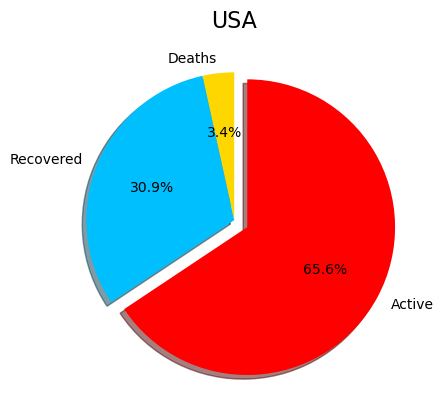

In [92]:
# Konverter dataframe til en liste
dist_us_values = dist_us.values.flatten()

# Plot pie chart
plt.pie(dist_us_values, labels=dist_us.columns, colors=colors_series, explode=explode, startangle=90,
        autopct='%.1f%%', shadow=True)

plt.title('USA', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Brazil')

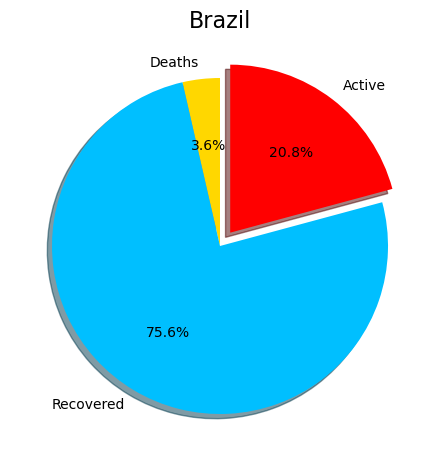

In [93]:
fig = plt.figure(figsize=(18, 12))

# Plot for Brazil
plt.subplot(221)
dist_brazil_values = dist_brazil.values.flatten()
plt.pie(dist_brazil_values, labels=dist_brazil.columns, colors=colors_series, explode=explode, startangle=90,
        autopct='%.1f%%', shadow=True)
plt.title('Brazil', fontsize=16)

Text(0.5, 1.0, 'India')

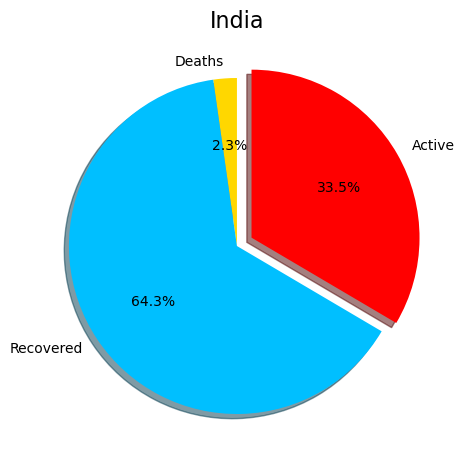

In [94]:
fig = plt.figure(figsize=(18, 12))
# Plot for India
plt.subplot(222)
dist_india_values = dist_india.values.flatten()
plt.pie(dist_india_values, labels=dist_india.columns, colors=colors_series, explode=explode, startangle=90,
        autopct='%.1f%%', shadow=True)
plt.title('India', fontsize=16)

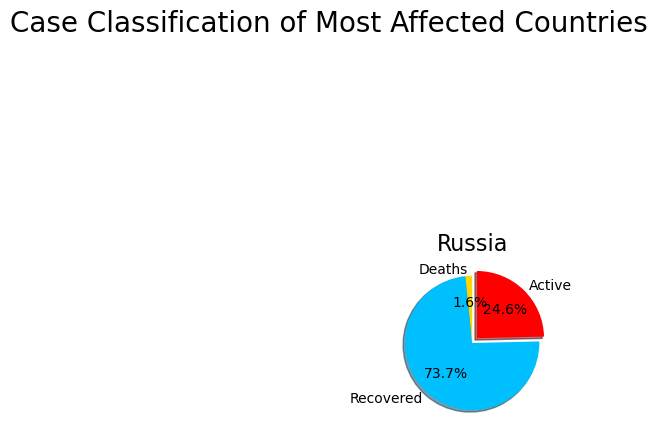

In [111]:

# Plot for Russia
plt.subplot(224)
dist_russia_values = dist_russia.values.flatten()
plt.pie(dist_russia_values, labels=dist_russia.columns, colors=colors_series, explode=explode, startangle=90,
        autopct='%.1f%%', shadow=True)
plt.title('Russia', fontsize=16)

# Add a main title
plt.suptitle('Case Classification of Most Affected Countries', fontsize=20)

plt.show()

In [68]:
# c. Most affected continents' negative case vs positive case percentage composition
# For this we need a new dataset 
# https://ourworldindata.org/coronavirus-source-data Follow this link for our next dataset


#### Følgende kode vil producere et cirkeldiagram, der illustrerer den procentvise sammensætning af negative tilfælde og positive tilfælde i de fleste berørte kontinenter.

In [108]:
# Firstly Data
negative_positive = pd.read_csv(r"C:\Users\denso\Downloads\owid-covid-data.csv")
negative_positive = negative_positive.groupby('continent')[['total_cases','total_tests']].sum()
explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

In [110]:
negative_positive.columns

Index(['total_cases', 'total_tests'], dtype='object')

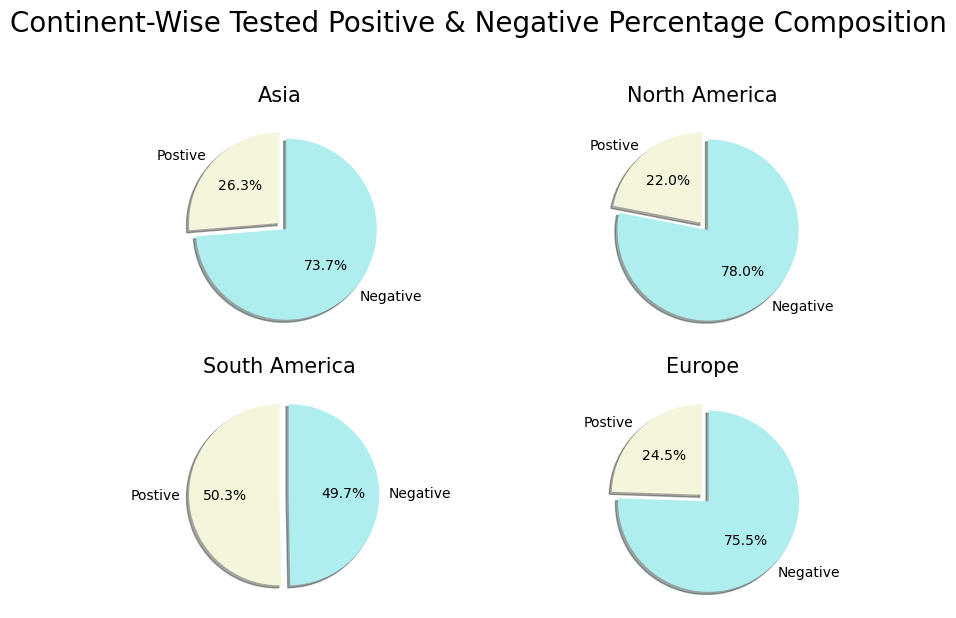

In [70]:
fig = plt.figure(figsize=(10, 10))

continents = ['Asia', 'North America', 'South America', 'Europe']
for i, continent in enumerate(continents, start=1):
    plt.subplot(3, 2, i)
    data = negative_positive[negative_positive.index == continent].values.flatten()
    plt.pie(data, labels=labels, explode=explode, autopct='%.1f%%',
            startangle=90, colors=colors, shadow=True)
    plt.title(continent, fontsize=15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize=20)
plt.show()
